# Fischer's Iris Data Set

## About

Introduced by Ronald Fisher, a British statistician and biologist in his 1936 paper entitled _The use of multiple measurements in taxonomic problems_, the famous [Iris Data](https://en.wikipedia.org/wiki/Iris_flower_data_set) Set was used as an example of [linear discriminant analysis](http://sebastianraschka.com/Articles/2014_python_lda.html).

The Data Set contains 3 species of _Iris_
- _Iris setosa_
- _Iris versicolor_
- _Iris virginica_

For each of the species listed above there is 50 samples of four distinct features of the _Iris_ plants. The features are listed below.

- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

The **Fisher's _Iris_ data set** is one of many data sets commonly used today in the use of statisical analysis and machine learning along with other data sets such as [MNIST](http://yann.lecun.com/exdb/mnist/) and [Old Faithful](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat)

## Get and load the data

### Imports & Reference Links

In [1]:
# Reference links:
#    Data set pulled from: https://gist.github.com/curran/a08a1080b88344b0c8a7
#    https://stackoverflow.com/questions/3518778/how-to-read-csv-into-record-array-in-numpy
#    https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html

# imports and preliminaries
import numpy as np
import matplotlib.pyplot as pl

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

### Below is a couple of ways of reading various components of the data set into arrays

- iris_data - The entire data set
- sepal_length - Sepal length data (All Species)
- sepal_width - Sepal width data (All Species)
- petal_length - Petal length data (All Species)
- petal_width - Petal width data (All Species)
- setosa, versicolor, virginica (Data particular to each of the species)

In [15]:
iris_data = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))

sepal_length = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=1, usecols=0)
sepal_width = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=1, usecols=1)

petal_length = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=1, usecols=2)
petal_width = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=1, usecols=3)

setosa = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3), max_rows=50)
versicolor = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=51, max_rows=50)
virginica = np.genfromtxt('iris-data-set.csv', delimiter=',', skip_header=101, max_rows=50)

# Uncomment any of the below to inspect the data output
#iris_data
#sepal_length
#sepal_width
#setosa
#versicolor
#virginica

## Investigate the data by creating a simple plot

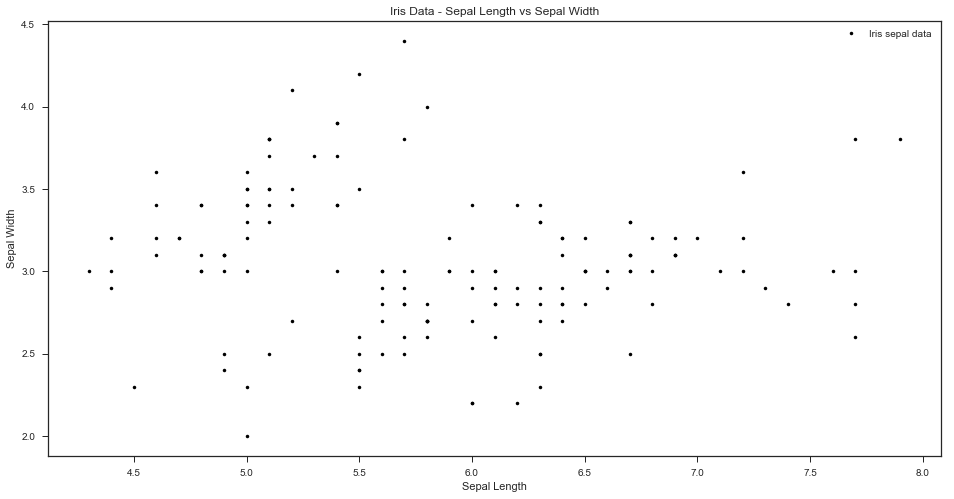

In [16]:
pl.plot(sepal_length, sepal_width, 'k.', label='Iris sepal data')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.title('Iris Data - Sepal Length vs Sepal Width')
pl.legend()
pl.show()

## Create a more complex plot

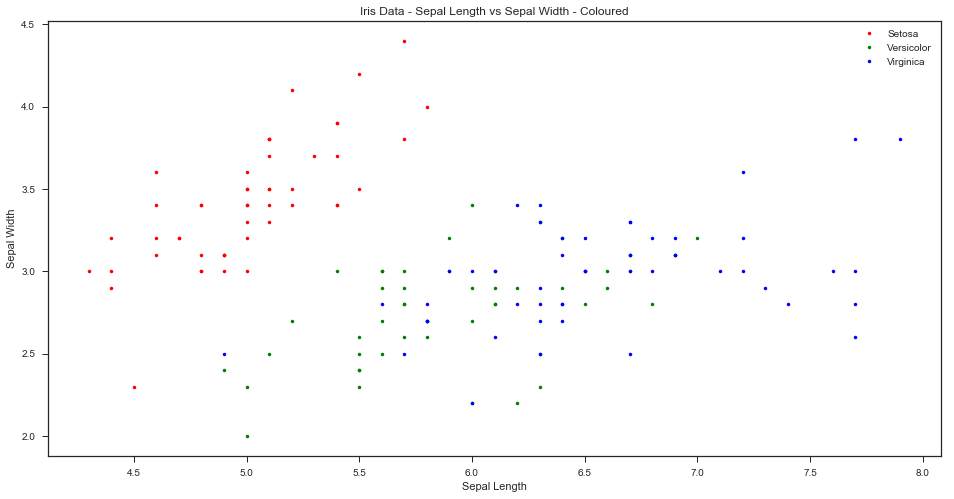

In [18]:
# Use extended slices syntax [begin:end:step]
pl.plot(sepal_length[0:50:1], sepal_width[0:50:1], 'r.', label='Setosa')
pl.plot(sepal_length[50:100:1], sepal_width[50:100:1], 'g.', label='Versicolor')
pl.plot(sepal_length[100:150:1], sepal_width[100:150:1], 'b.', label='Virginica')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.title('Iris Data - Sepal Length vs Sepal Width - Coloured')
pl.legend()
pl.show()

## Seaborn Scatterplot Matrix

### Seaborn - Statistical Data Visualization

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

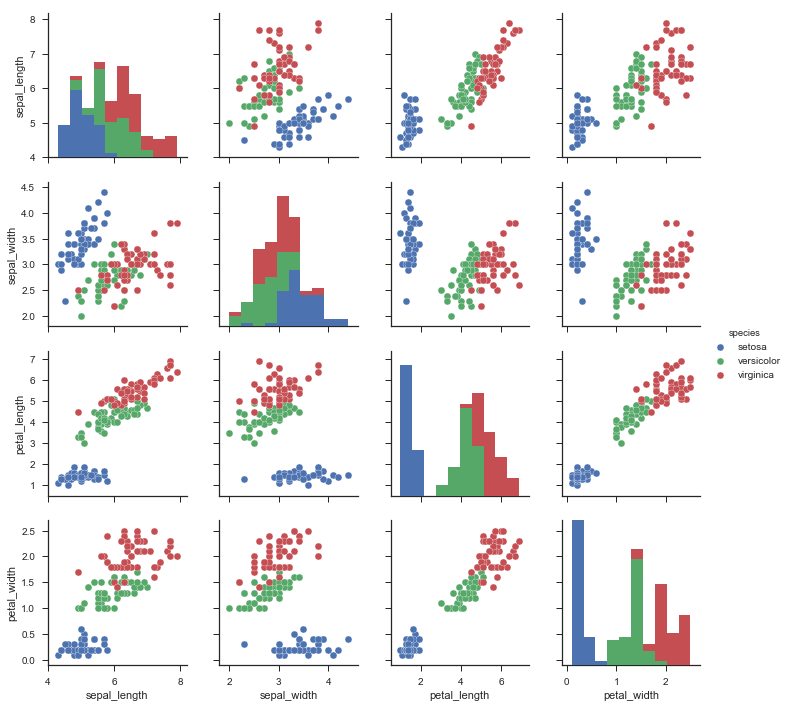

In [8]:
# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#load
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
pl.show()

## Fit a straight line to the whole data set

Best fit is m = 0.416419 and c = -0.366514


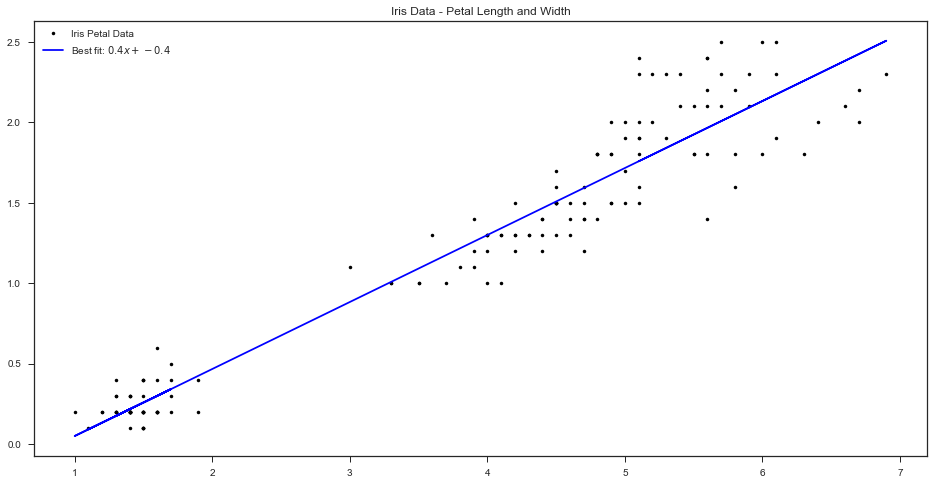

In [19]:
m, c = np.polyfit(petal_length, petal_width, 1)
print("Best fit is m = %f and c = %f" % (m, c))

# Plot the best fit line.
pl.plot(petal_length, petal_width, 'k.', label='Iris Petal Data')
pl.plot(petal_length, m * petal_length + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.title('Iris Data - Petal Length and Width')
pl.legend()
pl.show()

## Calculate the R-squared value for the line above

R-Squared is a statisical measure of how close the data are to the fitted regression line. It also known as the coefficient of determination.

In [10]:
# Calculate the R-squared value for our data set.

rsq = 1.0 - (np.sum((petal_width - m * petal_length - c)**2)/np.sum((petal_width - np.mean(petal_width))**2))
print("The R-squared value is %6.4f" % rsq)

# The same value using numpy.
np.corrcoef(petal_length, petal_width)[0][1]**2

The R-squared value is 0.9269


0.92690122792200358

## Fit another straight line to the data set where the species is only _setosa_

Best fit is m = 0.189262 and c = -0.033080


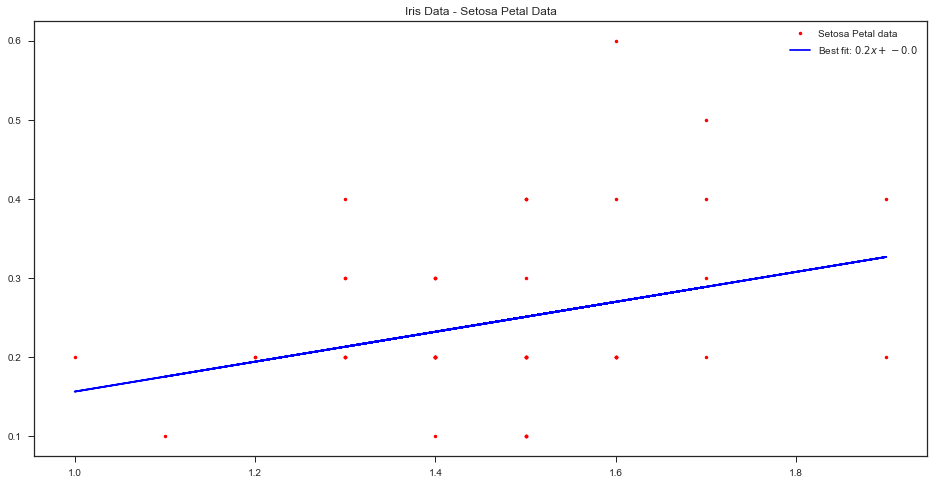

In [20]:
m, c = np.polyfit(petal_length[0:50:1], petal_width[0:50:1], 1)
print("Best fit is m = %f and c = %f" % (m, c))

# Plot the best fit line.
pl.plot(petal_length[0:50:1], petal_width[0:50:1], 'r.', label='Setosa Petal data')
pl.plot(petal_length[0:50:1], m * petal_length[0:50:1] + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.title('Iris Data - Setosa Petal Data')
pl.legend()
pl.show()

## Calculate the R-Squared value for the line above

In [12]:
# Calculate the R-squared value for our setosa data set.

rsq = 1.0 - (np.sum((petal_width[0:50:1] - m * petal_length[0:50:1] - c)**2)/np.sum((petal_width[0:50:1] - np.mean(petal_width[0:50:1]))**2))
print("The R-squared value is %6.4f" % rsq)

# The same value using numpy.
np.corrcoef(petal_length[0:50:1], petal_width[0:50:1])[0][1]**2

The R-squared value is 0.0938


0.09382472022283582

## Gradient Descent

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

In [13]:
def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

In [14]:
eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(petal_length[0:50:1], petal_width[0:50:1], m, c)
  cnew = c - eta * grad_c(petal_length[0:50:1], petal_width[0:50:1], m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew

print("m: %20.16f  c: %20.16f" % (m, c))

m:   0.1892624728849683  c:  -0.0330802603035933


### Conclusion

Both Numpy's polyfit() function and the Gradient Descent algorithm for min

Best fit using numpy's polyfit() function:

**- m:   0.189262            c:  -0.033080**

Best fit using Graident Descent:

**- m:   0.1892624728849683  c:  -0.0330802603035933**